In [18]:
from matplotlib import pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv("US_Births.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# Using the CDC's 2018 Natality Public Use File Documentation:
# ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/DVS/natality/UserGuide2018-508.pdf

# remove the values that correspond to NaN for father's education
df = df[df.FEDUC != 9]
df = df[df.FEDUC != 0]

# remove the values that correspond to NaN for mother's education
df = df[df.MEDUC != 9]
df = df[df.MEDUC != 0]

# remove the values that correspond to NaN for birth weight
df = df[df.DBWT != 9999]

In [12]:
father_education = df["FEDUC"]
mother_education = df["MEDUC"]
birth_weight = df["DBWT"]

In [13]:
table = df.pivot_table(index="FEDUC", columns="MEDUC",values="DBWT")

In [41]:
positions = np.arange(1,9)
positions
labels = ("N/A",
"HS-",  
"HS",  
"AA-",
"AA", 
"BA", 
"MA", 
"PhD")

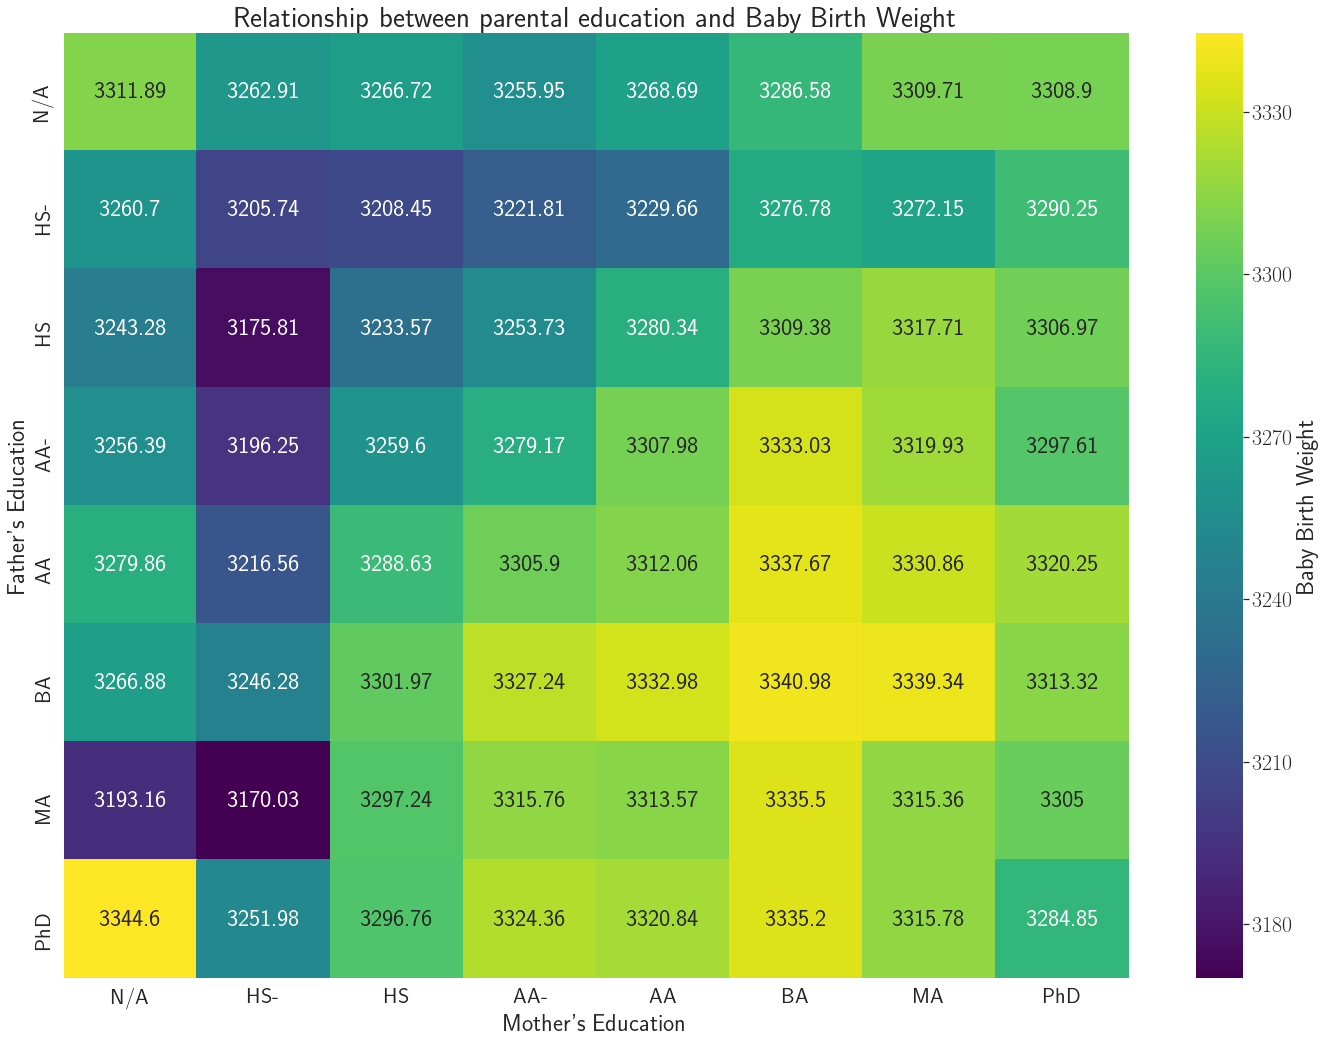

In [42]:
plt.rc('text', usetex=True)

sns.set(font_scale=2)
plt.subplots(figsize=(20,15))
sns.heatmap(table, annot=True, fmt="g", cmap='viridis', cbar_kws={'label': 'Baby Birth Weight'})

plt.xticks(positions -0.5, labels)
plt.yticks(positions -0.5, labels)

plt.xlabel("Mother's Education", fontsize="medium")
plt.ylabel("Father's Education", fontsize="medium")
plt.title("Relationship between parental education and Baby Birth Weight", fontsize="large")
plt.tight_layout()
plt.savefig("US_Births.png", bbox_inches="tight", dpi=400)

